In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Systemic redshift

In [7]:
z_sys = 0.94480935 #0.94479898 #0.94479768 #0.944791

In [8]:
#np.round(0.94479898+((1+0.94479898)*1.6/3e+5), 8)

# HI

## HI 1025
Get HI 1025 from COS STIS

In [9]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [10]:
hi_1025_stis.grab_ion_transition_info()

In [11]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list)

In [12]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

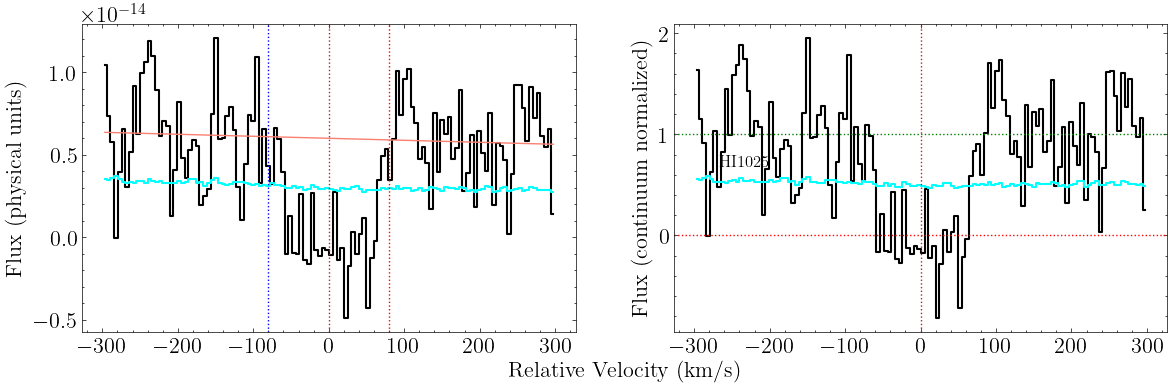

In [13]:
fig, ax = hi_1025_stis.plot_ion_transition_spec_cont()

In [14]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [15]:
#hi_972_nuv.init_multi_voigt(init_values = np.array([[15.66, 20, 0]]), 
#                             lsf_convolve = True)

hi_1025_stis.init_ion_transition([[15.52, 43.1, 0.0]], lsf_convolve = True)

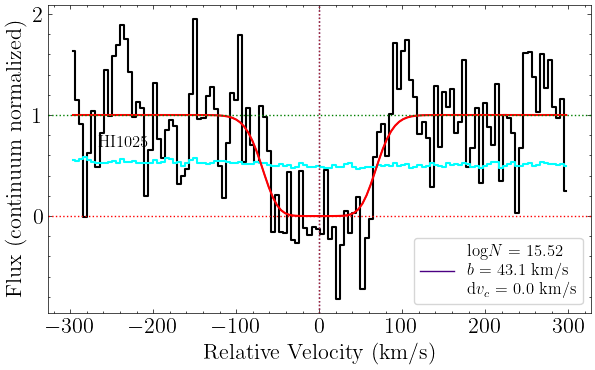

In [16]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [17]:
hi_1025_stis.fit_ion_transition()

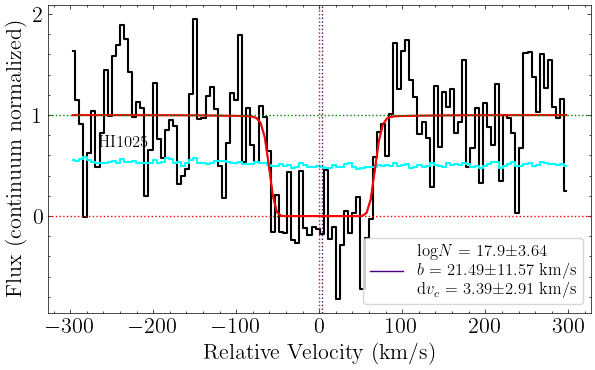

In [18]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

## HI 972

Get HI 972 from COS NUV

In [19]:
hi_972_nuv = ion_transition('HI', 972, 'H', z_sys, 'NUV')

In [20]:
hi_972_nuv.grab_ion_transition_info()

In [21]:
hi_972_nuv.grab_ion_transition_spec(spec_fits_list)

In [22]:
hi_972_nuv.cont_norm_flux(v_abs_range=[-100,120], degree=1)

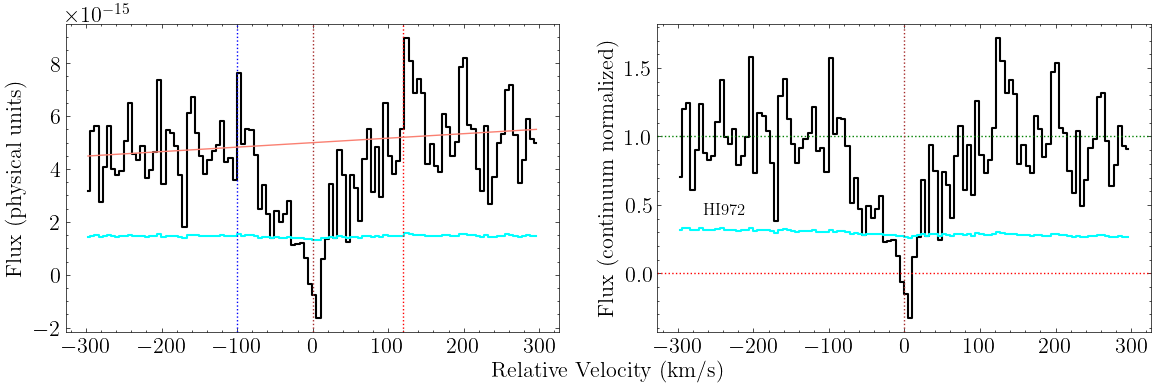

In [23]:
fig, ax = hi_972_nuv.plot_ion_transition_spec_cont()

In [24]:
hi_972_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [25]:
#hi_972_nuv.init_multi_voigt(init_values = np.array([[15.66, 20, 0]]), 
#                             lsf_convolve = True)

hi_972_nuv.init_ion_transition(init_values = np.array([[15.5, 40, 0]]), #[14.8, 20, 50]]), 
                             lsf_convolve = True)

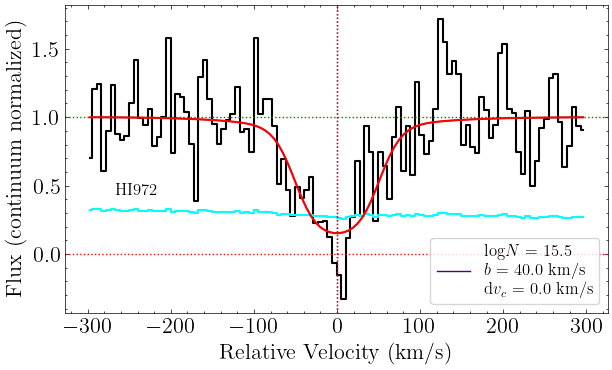

In [26]:
fig, ax = hi_972_nuv.plot_ion_transition_init_fit()

In [27]:
hi_972_nuv.fit_ion_transition()

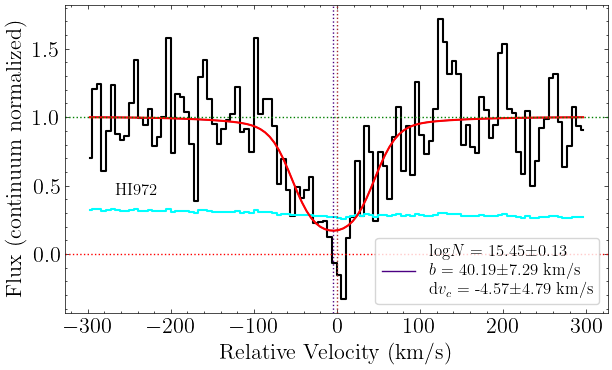

In [28]:
fig, ax = hi_972_nuv.plot_ion_transition_best_fit()

## HI 949

Get HI 949 from COS NUV

In [29]:
hi_949_nuv = ion_transition('HI', 949, 'H', z_sys, 'NUV')

In [30]:
hi_949_nuv.grab_ion_transition_info()

In [31]:
hi_949_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-105]])

In [32]:
hi_949_nuv.cont_norm_flux(v_abs_range=[-70,130], degree=1)

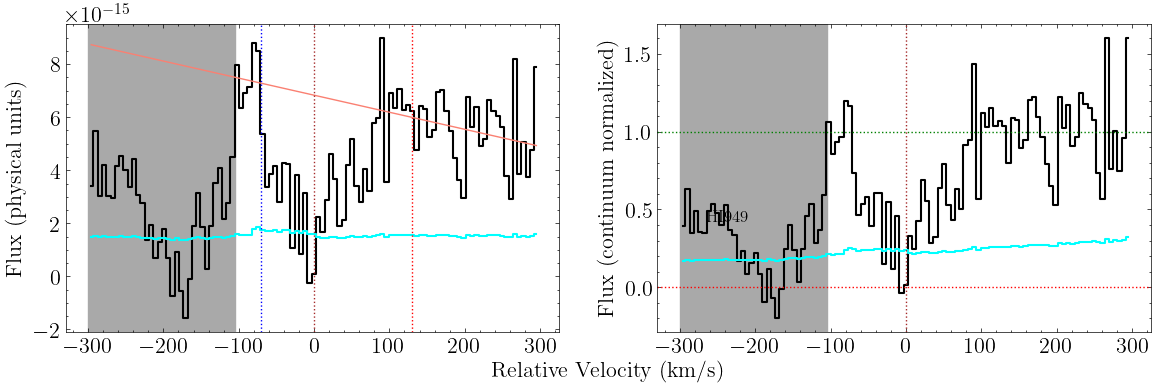

In [33]:
fig, ax = hi_949_nuv.plot_ion_transition_spec_cont()

In [34]:
hi_949_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [35]:
#hi_972_nuv.init_ion_transition(init_values = np.array([[15.66, 20, 0],[14.5, 20, 25]]), 
#                             lsf_convolve = True)

hi_949_nuv.init_ion_transition(init_values = hi_972_nuv.best_values, 
                             lsf_convolve = True)

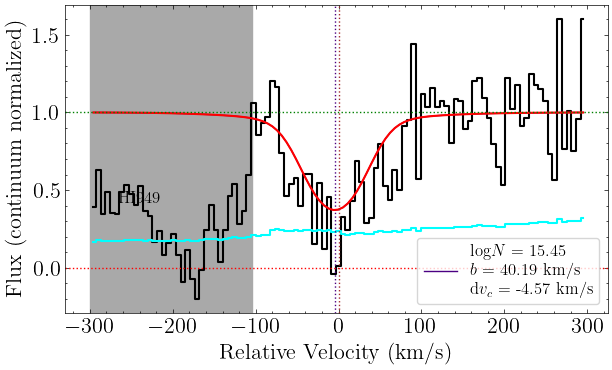

In [36]:
fig, ax = hi_949_nuv.plot_ion_transition_init_fit()

In [37]:
hi_949_nuv.fit_ion_transition()

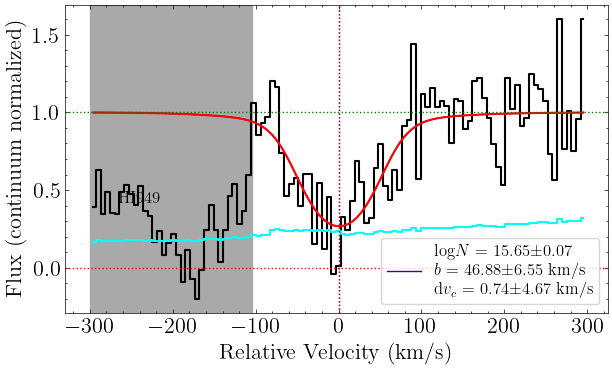

In [38]:
fig, ax = hi_949_nuv.plot_ion_transition_best_fit()

## HI 937

Get HI 937 from COS NUV

In [39]:
hi_937_nuv = ion_transition('HI', 937, 'H', z_sys, 'NUV')

In [40]:
hi_937_nuv.grab_ion_transition_info()

In [41]:
hi_937_nuv.grab_ion_transition_spec(spec_fits_list)

In [42]:
hi_937_nuv.cont_norm_flux(v_abs_range=[-70,80], degree=1)

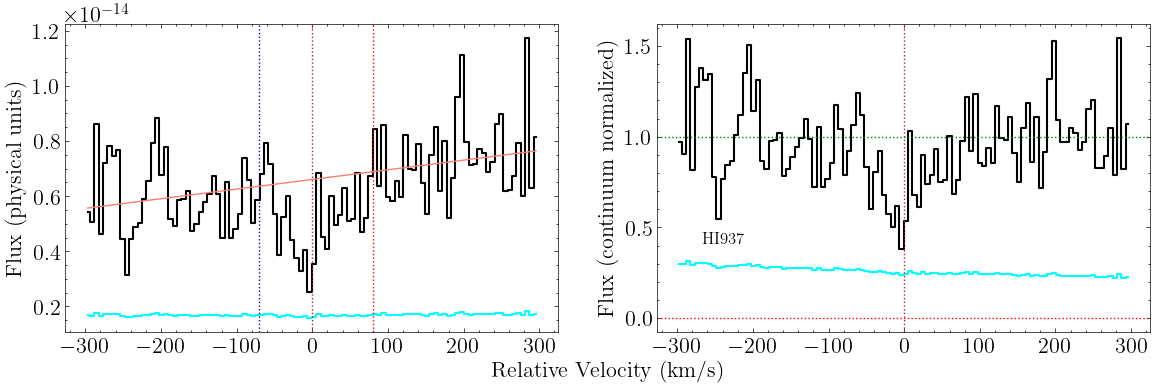

In [43]:
fig, ax = hi_937_nuv.plot_ion_transition_spec_cont()

In [44]:
hi_937_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [45]:
#hi_972_nuv.init_multi_voigt(init_values = np.array([[15.66, 20, 0]]), 
#                             lsf_convolve = True)

hi_937_nuv.init_ion_transition(init_values = hi_949_nuv.best_values, 
                             lsf_convolve = True)

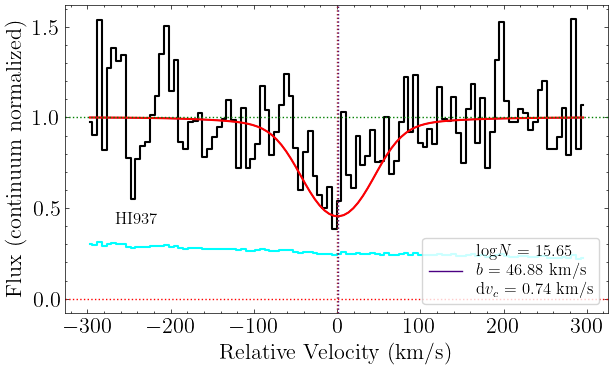

In [46]:
fig, ax = hi_937_nuv.plot_ion_transition_init_fit()

In [47]:
hi_937_nuv.fit_ion_transition()

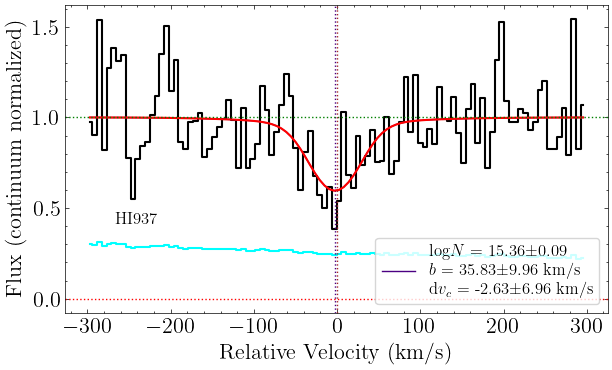

In [48]:
fig, ax = hi_937_nuv.plot_ion_transition_best_fit()

## HI 930

Get HI 930 from COS NUV

In [49]:
hi_930_nuv = ion_transition('HI', 930, 'H', z_sys, 'NUV')

In [50]:
hi_930_nuv.grab_ion_transition_info()

In [51]:
hi_930_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-260]])

In [52]:
hi_930_nuv.cont_norm_flux(v_abs_range=[-90,90], degree=1)

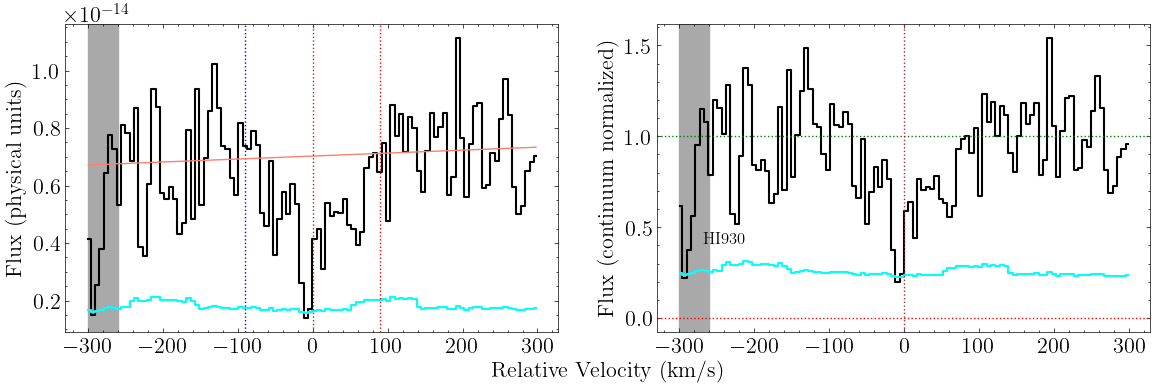

In [53]:
fig, ax = hi_930_nuv.plot_ion_transition_spec_cont()

In [54]:
hi_930_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [55]:
hi_930_nuv.init_ion_transition([[15.52, 43.1, 0.0]], lsf_convolve = True)

#hi_930_nuv.init_multi_voigt(hi.best_values_shared, lsf_convolve = True)

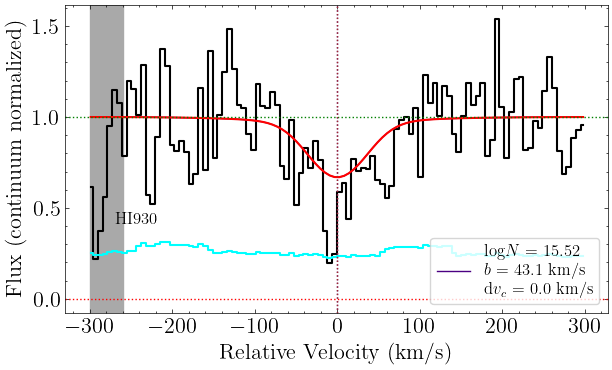

In [56]:
fig, ax = hi_930_nuv.plot_ion_transition_init_fit()

In [57]:
hi_930_nuv.fit_ion_transition()

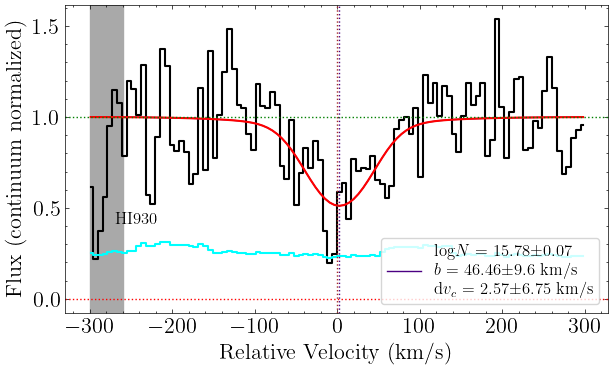

In [58]:
fig, ax = hi_930_nuv.plot_ion_transition_best_fit()

## HI ion

Compile the HI ion

In [59]:
hi = ion(z_sys, 'HI', [hi_1025_stis, hi_972_nuv, hi_949_nuv, hi_937_nuv, hi_930_nuv])

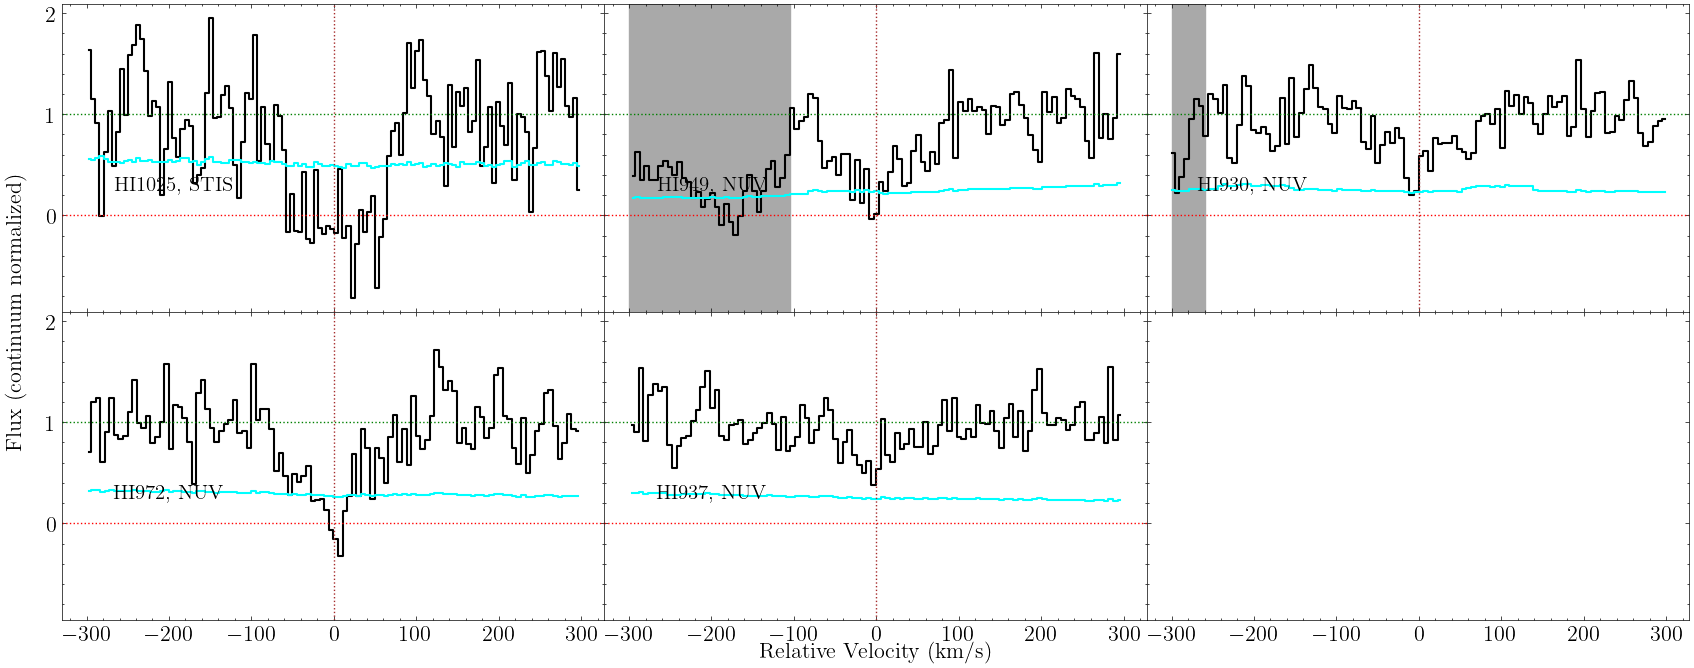

In [60]:
fig, axes = hi.plot_ion(n_cols=3)

In [61]:
hi.init_ion([[[15.4, 37, 0]],
             [[15.4, 37, 0]],
             [[15.4, 37, 0]],
             [[15.4, 37, 0]],
             [[15.4, 37, 0]],
            ])

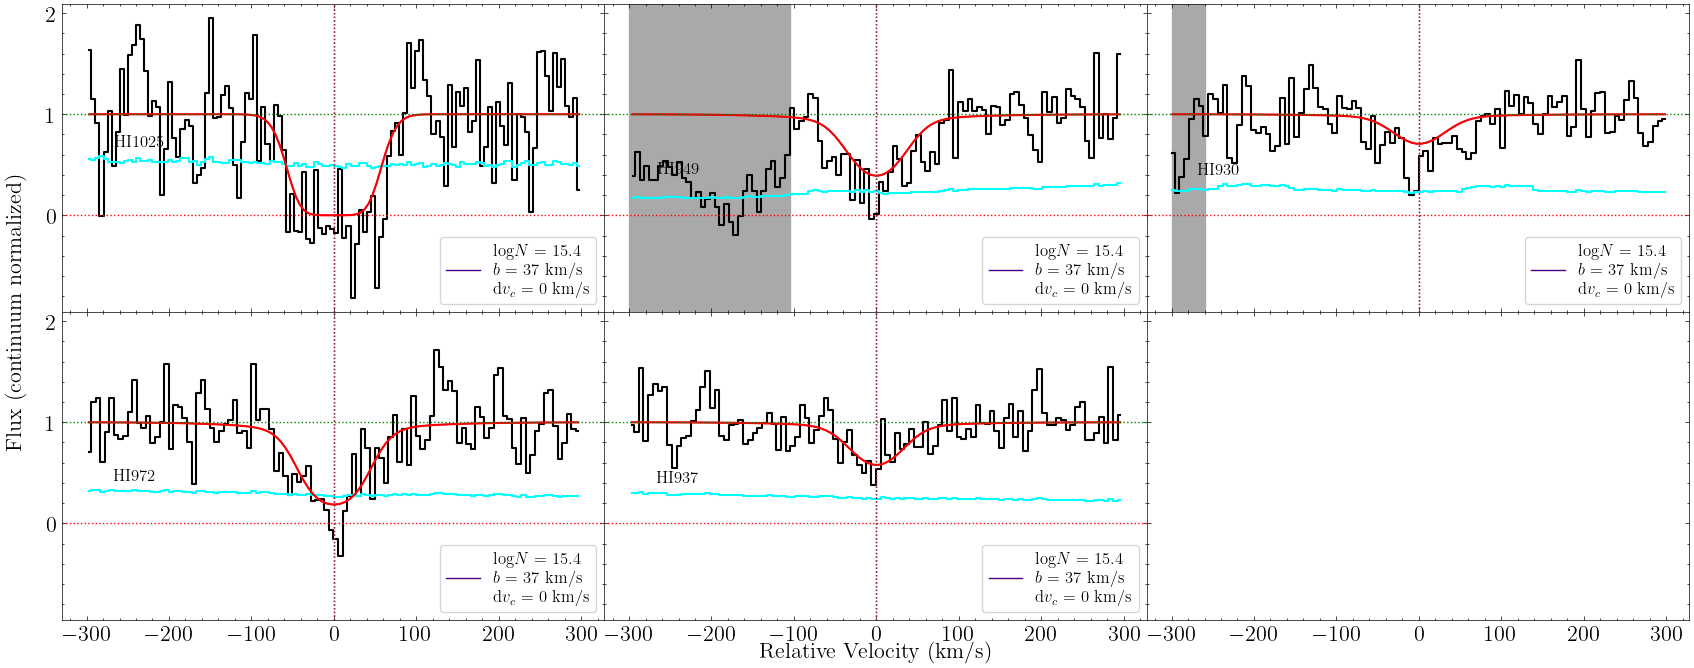

In [62]:
fig, axes = hi.plot_ion_init_fit(n_cols=3)

In [63]:
hi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                              ['it1c1_logN', 'it3c1_logN'],
                              ['it1c1_logN', 'it4c1_logN'],
                              ['it1c1_logN', 'it5c1_logN'],
                              ['it1c1_b', 'it2c1_b'],
                              ['it1c1_b', 'it3c1_b'],
                              ['it1c1_b', 'it4c1_b'],
                              ['it1c1_b', 'it5c1_b'],
                              ['it1c1_dv_c', 'it2c1_dv_c'],
                              ['it1c1_dv_c', 'it3c1_dv_c'],
                              ['it1c1_dv_c', 'it4c1_dv_c'],
                              ['it1c1_dv_c', 'it5c1_dv_c'],
                             ])

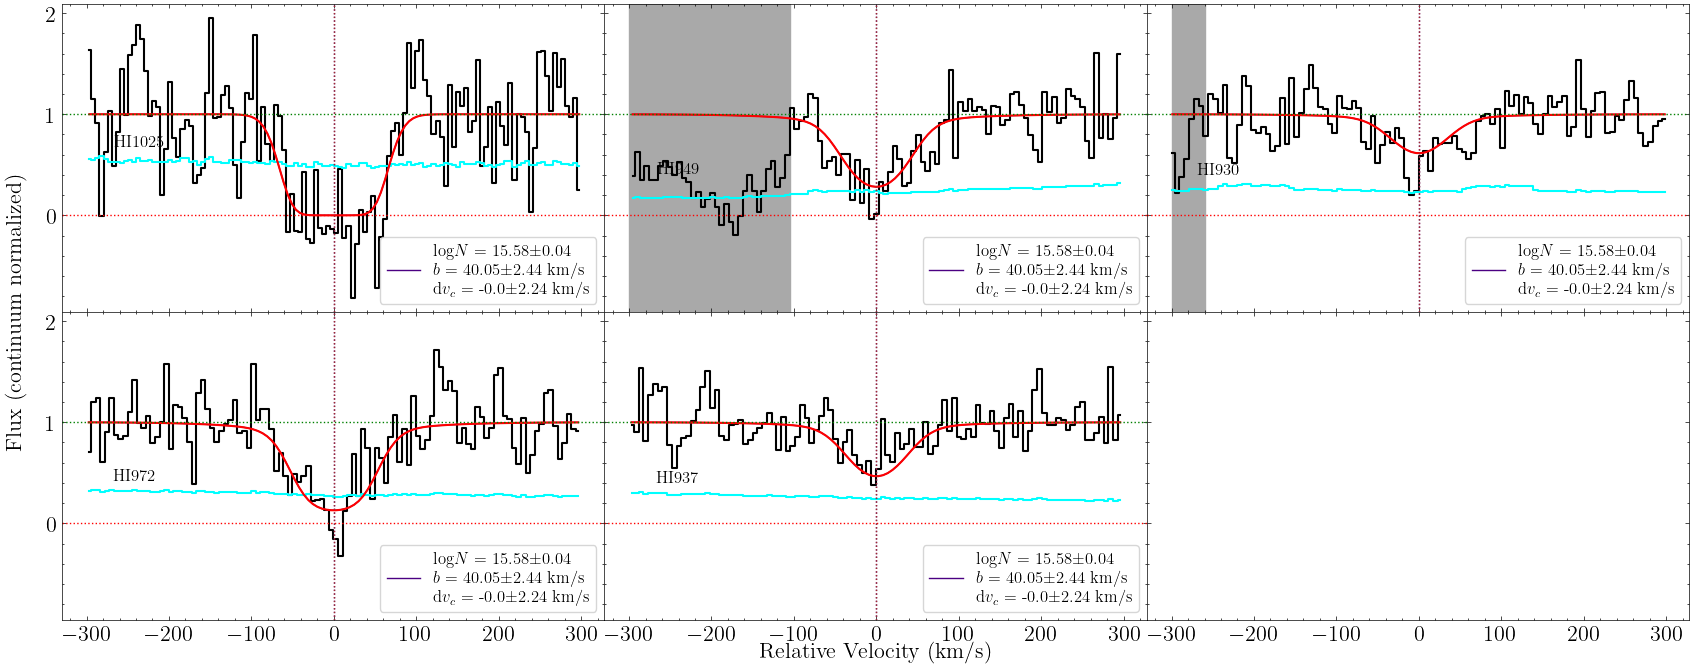

In [64]:
fig, axes = hi.plot_ion_best_fit(n_cols=3)

In [65]:
hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-14, n_walkers=200, n_steps=5000)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

100%|███████████████████████████████████████| 5000/5000 [13:39<00:00,  6.10it/s]


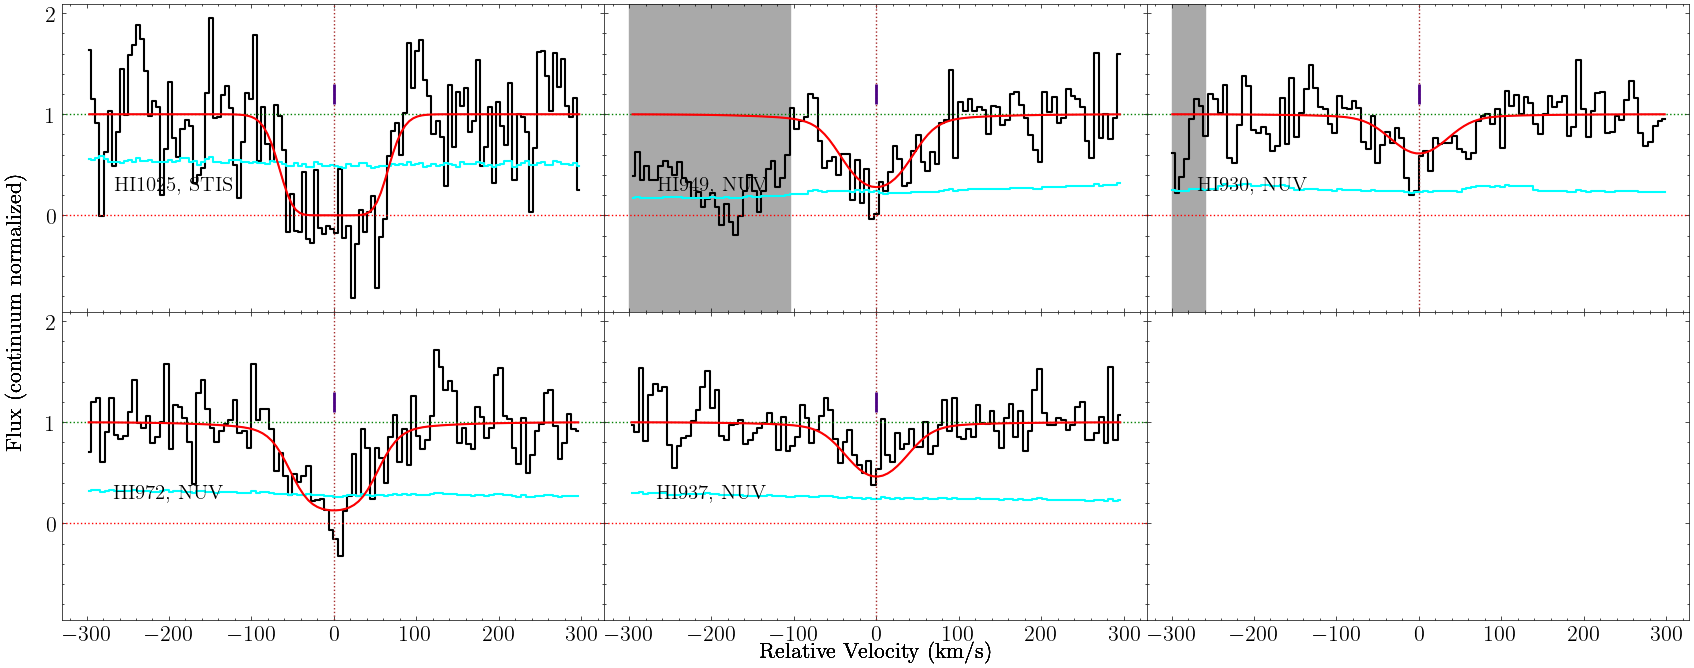

In [66]:
fig, axes = hi.plot_samples(n_cols=3)

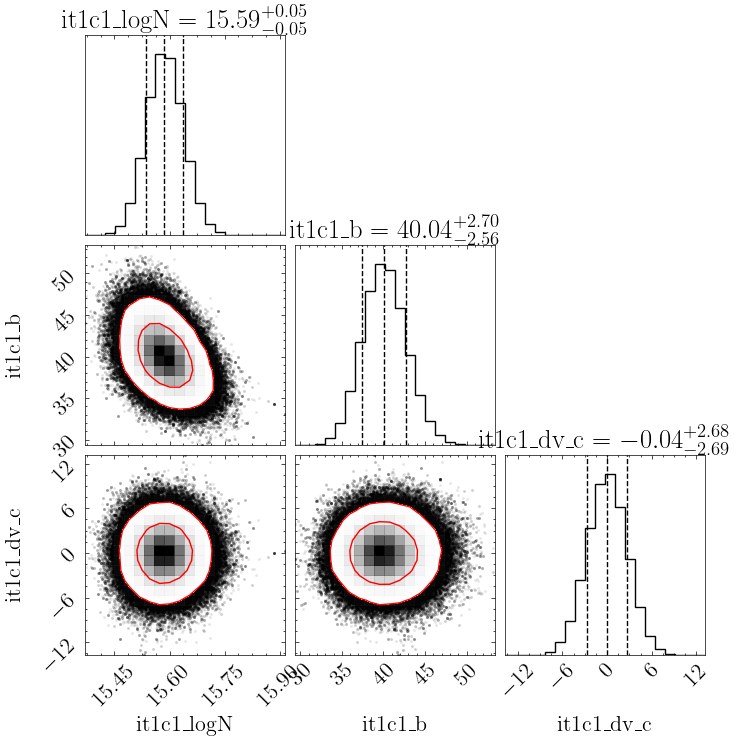

In [67]:
hi.plot_corner()

## HI 1215
Get HI 1215 from COS STIS

In [68]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [69]:
hi_1215_stis.grab_ion_transition_info()

In [70]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list)

In [71]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-180,150], degree=1)

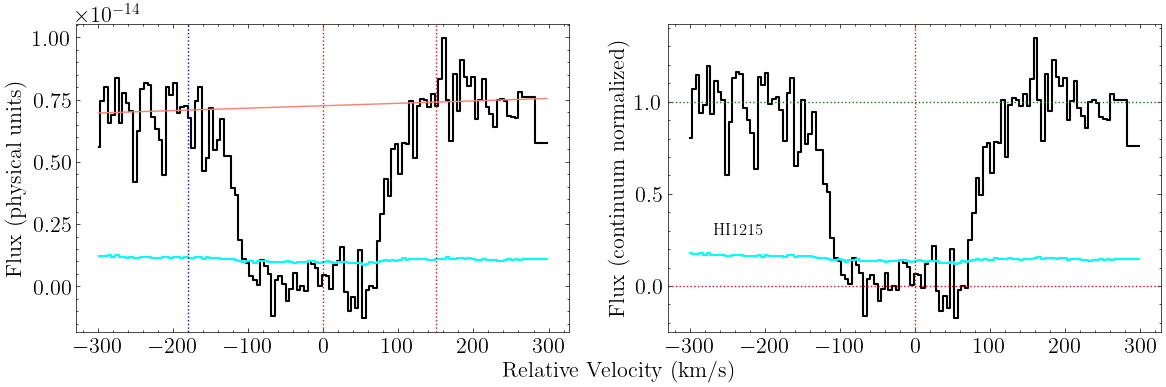

In [72]:
fig, ax = hi_1215_stis.plot_ion_transition_spec_cont()

In [73]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [74]:
hi_1215_stis.init_ion_transition([[15.58, 40.1, 0.0]], lsf_convolve = True)

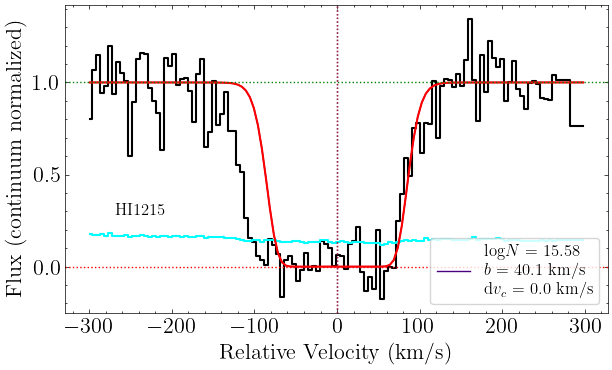

In [75]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()